# [Reacher](https://gymnasium.farama.org/environments/mujoco/reacher/).
En este proeycto aplicaremos aprendisaje por refuerzo (RL) para llevar a cabo el problema del aprendisaje mediante interacciones del [Reacher](https://gymnasium.farama.org/environments/mujoco/reacher/). y el uso de un *agente* que ira aprendiendo del entorno mediante la interaccion con este recibiendo recompensas como retroalimentacion (negativas o positivas)
-aplicaremos la tasa de descuento llamada gama (debe de estar enntre 0 y 1) tentativamente 0,95 y 0,99 a mallor gama, menor sera el descuento
para ver la eficiencia del algoritmo graficaremos
la suma de las recompensas durante el episodio (y)
episodio (x)

#### ¿Cual algoritmo elegir para el Reacher?
como el reacher-v4 es un entorno continuo es decir que el brazo toma valores dentro de un rango continuo para hacer el torque, intentaremos aplicar un Model-free como el Deep Deterministic Policy Gradient (DDPG) ya que funciona bien en espacios continuos, ¿se puede usar stable-baselines3?

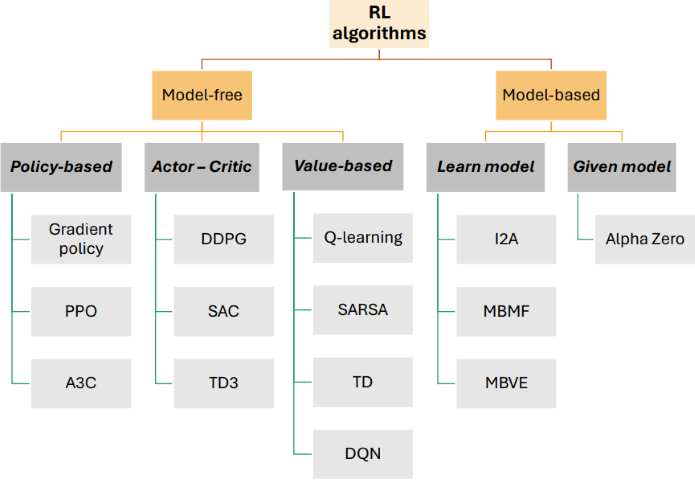

#### ¿Cuales podemos utilizar?
- Proceso de decisión de Markov (MDP)
Estado (S): posisiones de los brazos, posision del objetivo, velocidades angulares y vector de posicion
Accion (A): Torques
Reward (R): segun la distancia objetivo y la magnitud de las acciones 

- Deep Deterministic Policy Gradient (DDPG)


In [48]:
import gymnasium as gym
import numpy as np
import imageio
from IPython.display import Image

env = gym.make('Reacher-v4')

state = env.reset()
num_states = env.observation_space.shape[0]
num_actions = env.action_space.shape[0]

print("Estado: ", state)
print("Numero de estados: ", num_states)
print("Numero de acciones: ", num_actions)

Estado:  (array([ 0.99945388,  0.99588718, -0.03304463,  0.09060203, -0.00102765,
       -0.13809649,  0.00395456, -0.00406169,  0.21079013,  0.14113285,
        0.        ]), {})
Numero de estados:  11
Numero de acciones:  2


In [64]:
# Crear el entorno
env = gym.make('Reacher-v4', render_mode="rgb_array")
state, info = env.reset()

num_actions = env.action_space.shape[0]
fixed_actions = [np.array([0.1, 0.1]) for _ in range(50)]

done = False
total_reward = 0
steps = 0
frames = []


print(f"Recompensa total: {total_reward}", "steps: ", steps)
env.close()

imageio.mimsave("reacher.gif", frames, fps=30)


Recompensa total: -273.7219778000617 steps:  300


# Vizualizar

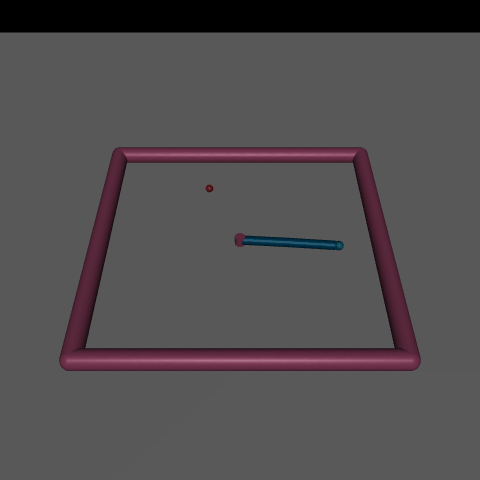

In [66]:
Image(filename="reacher.gif")